In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#

In [2]:
df = pd.read_csv(r"D:\CSV FILES/online_retail.csv", encoding="ISO-8859-1")
print("Initial Shape:", df.shape)

Initial Shape: (541909, 8)


In [3]:
df = df.dropna(subset=["CustomerID"]) # remove missing customer IDs

In [4]:
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")] # remove canceled orders

In [5]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]) # convert to datetime

In [6]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"] # calculate total

In [7]:
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)] # remove zero/negative
print("Cleaned Shape:", df.shape)
#

Cleaned Shape: (397884, 9)


In [8]:
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

In [9]:
rfm = df.groupby("CustomerID").agg({
"InvoiceDate": lambda x: (snapshot_date - x.max()).days, # recency
"InvoiceNo": "nunique", # frequency
"TotalPrice": "sum" # monetary
}).reset_index()

In [10]:
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]
print(rfm.head())
#

   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


In [11]:
rfm["R_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4,3,2,1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1,2,3,4])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])

In [12]:
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)
print(rfm.head())

   CustomerID  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
0     12346.0      326          1  77183.60       1       1       4       114
1     12347.0        2          7   4310.00       4       4       4       444
2     12348.0       75          4   1797.24       2       3       4       234
3     12349.0       19          1   1757.55       3       1       4       314
4     12350.0      310          1    334.40       1       1       2       112


In [17]:
def segment_customer(row):
    if row["R_Score"] == "4" and row["F_Score"] == "4" and row["M_Score"] == "4":
        return "Best Customers"


In [18]:
def segment_customer(row):
    if row["R_Score"] == "4" and row["F_Score"] == "4" and row["M_Score"] == "4":
        return "Best Customers"
    elif row["R_Score"] == "4":
        return "Loyal Customers"
    else:
        return "Other"


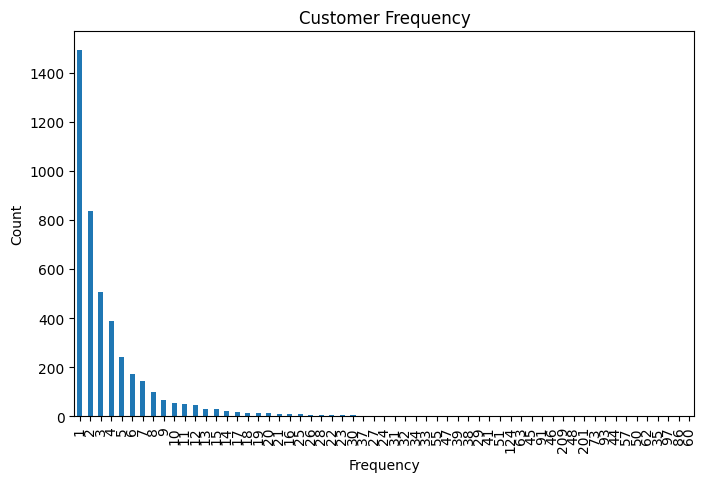

In [23]:
plt.figure(figsize=(8,5))
rfm["Frequency"].value_counts().plot(kind="bar")
plt.title("Customer Frequency")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.show()

In [22]:
print(rfm.columns)


Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score',
       'M_Score', 'RFM_Score'],
      dtype='object')


In [24]:
rfm.to_csv("rfm_segments.csv", index=False)
print("rfm_segments.csv saved")

rfm_segments.csv saved


In [29]:
actions = """
Champions:
1) VIP rewards 2) Personal offers 3) Exclusive discounts
Loyal:
1) Loyalty points 2) Thank-you email 3) Upsell specials
New:
1) Welcome discount 2) Onboarding guides 3) Product demos
At Risk:
1) Win-back offer 2) Feedback request 3) Discount push
Others:
1) Engagement emails 2) Reminder SMS 3) Targeted ads
"""
with open("file.txt", "w") as file:
    file.write(actions)
